# **Amazon Prime EDA**

**Importing necessary libraries**

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Loading DataSet**

In [5]:
df = pd.read_csv('/content/amazon_prime_titles.csv')

In [9]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


**Data Cleaning**

In [10]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [11]:
df.shape

(9668, 12)

In [12]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2082
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

In [42]:
df['duration'] = df['duration'].str.replace(' min', '')
df['duration'] = df['duration'].str.replace(' Season', '')
df['duration'] = df['duration'].str.replace('s', '')
df['duration'] = df['duration'].str.replace('h', '').astype(float)


There are so many null values !

**1) Movie vs Tv show count**

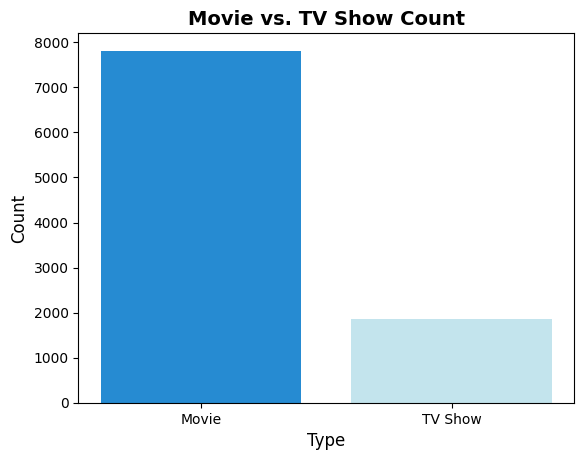

In [71]:
count = df['type'].value_counts()

fig, ax = plt.subplots()
bars = ax.bar(count.index, count.values, color=['#268bd2', '#c3e4ed'])

ax.set_xlabel('Type', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Movie vs. TV Show Count', fontsize=14, fontweight='bold')

plt.show()

**2) Pie Chart of Ratings Distribution**

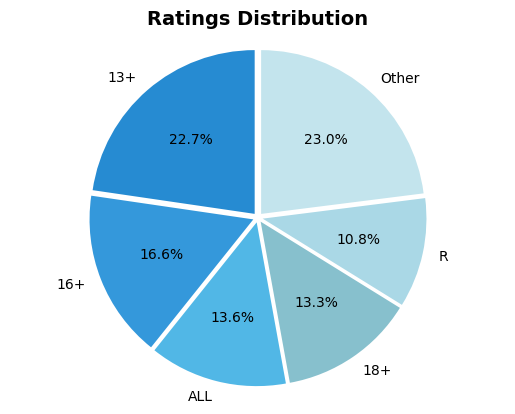

In [29]:
rating_counts = df['rating'].value_counts()

total_count = rating_counts.sum()

below_threshold = rating_counts[rating_counts / total_count < 0.05]

merged_rating_counts = rating_counts.copy()
merged_rating_counts.loc['Other'] = below_threshold.sum()
merged_rating_counts = merged_rating_counts.drop(below_threshold.index)
colors = ['#268bd2', '#3498db', '#51b7e6', '#87c0cd', '#aad8e6', '#c3e4ed']

explode = [0.03] * len(merged_rating_counts)

fig, ax = plt.subplots()

ax.pie(merged_rating_counts.values, labels=merged_rating_counts.index, autopct='%1.1f%%', startangle=90,
       colors=colors, explode=explode)

ax.set_title('Ratings Distribution', fontsize=14, fontweight='bold')

ax.axis('equal')

plt.show()

**3) Line Plot of Release Year**

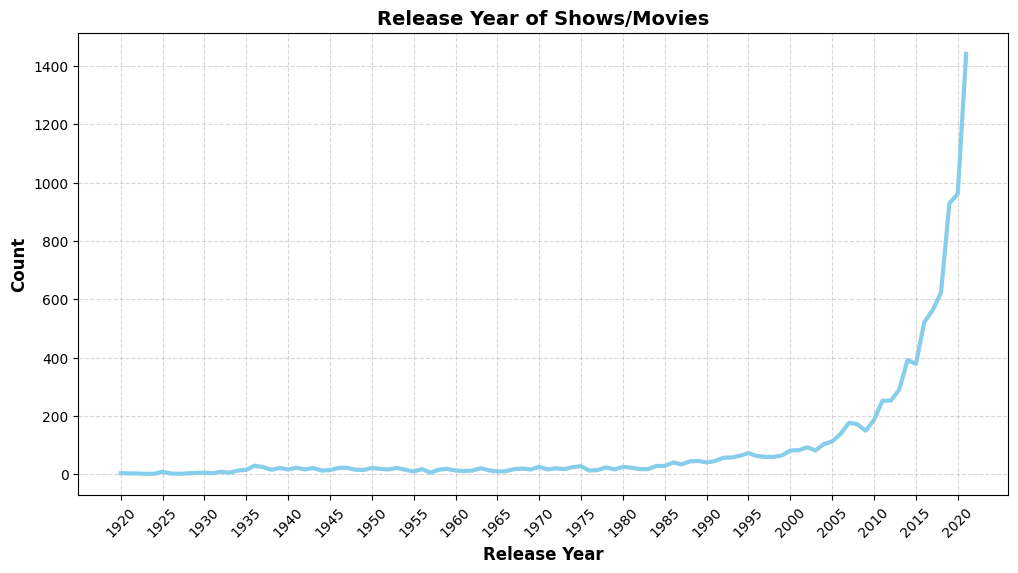

In [36]:
plt.figure(figsize=(12, 6))

release_year_counts = df['release_year'].value_counts().sort_index()

plt.plot(release_year_counts.index, release_year_counts.values, color='skyblue', linewidth=3)

plt.xlabel('Release Year', fontsize=12, fontweight='bold')

plt.ylabel('Count', fontsize=12, fontweight='bold')

plt.title('Release Year of Shows/Movies', fontsize=14, fontweight='bold')

plt.xticks(range(min(release_year_counts.index), max(release_year_counts.index)+1, 5), fontsize=10)
plt.xticks(rotation=45)

plt.grid(True, linestyle='--', alpha=0.5)

plt.show()


**4) Scatter Plot of Duration vs. Release Year:**

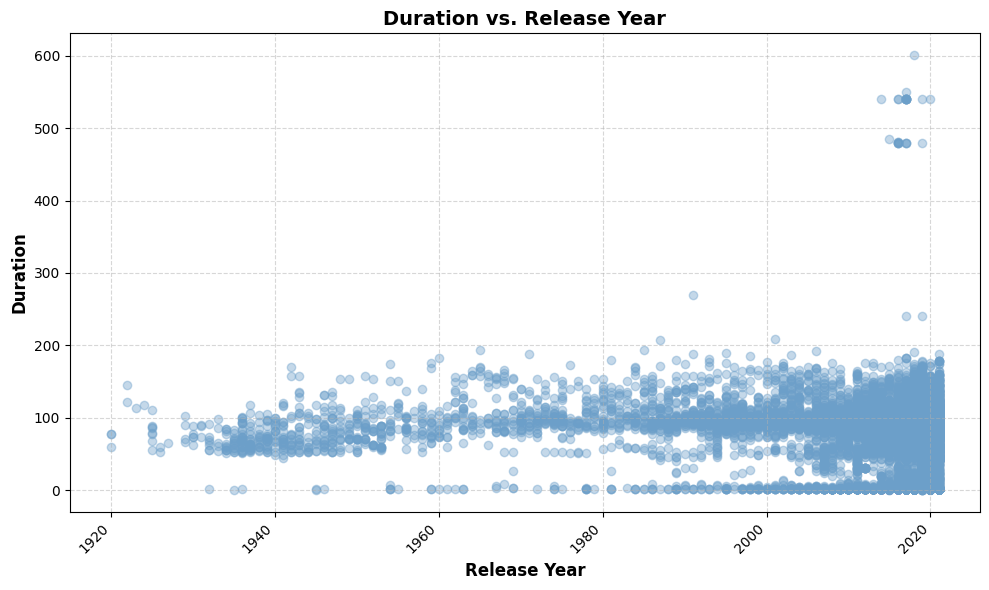

In [47]:
plt.figure(figsize=(10, 6))

plt.scatter(df['release_year'], df['duration'], color='#6c9fc9', alpha=0.4)

plt.xlabel('Release Year', fontsize=12, fontweight='bold')
plt.ylabel('Duration', fontsize=12, fontweight='bold')
plt.title('Duration vs. Release Year', fontsize=14, fontweight='bold')

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()

plt.show()


The values over 400 mins of duration indicate outliers and maybe it is possible due to multiple seasons !

**5) Histogram of Movie Duration**

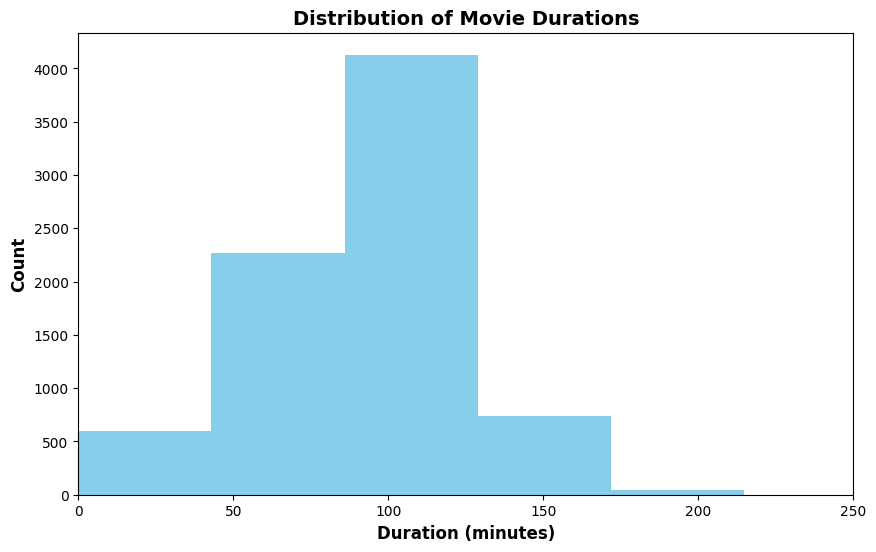

In [72]:
movie_durations = df[df['type'] == 'Movie']['duration']

plt.figure(figsize=(10, 6))
plt.hist(movie_durations, bins=14, color='skyblue')

plt.xlabel('Duration (minutes)', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.title('Distribution of Movie Durations', fontsize=14, fontweight='bold')

plt.xlim(0, 250)


plt.show()


The duration above 250 minutes were not taking into consideration since i found out that it is an outlier !

**6) Bar Plot of Top 5 Directors**

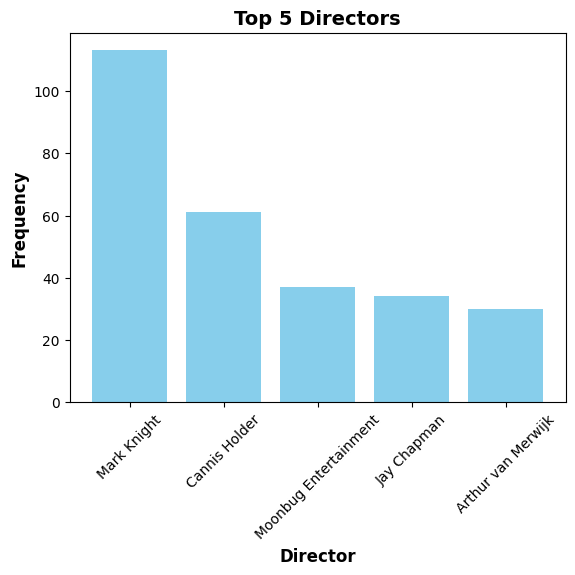

In [73]:
top_directors = df['director'].value_counts().head(5)

plt.bar(top_directors.index, top_directors.values, color='skyblue')

plt.xlabel('Director', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Top 5 Directors', fontsize=14, fontweight='bold')

plt.xticks(rotation=45)


plt.show()


**7) Word Cloud of Cast Members**

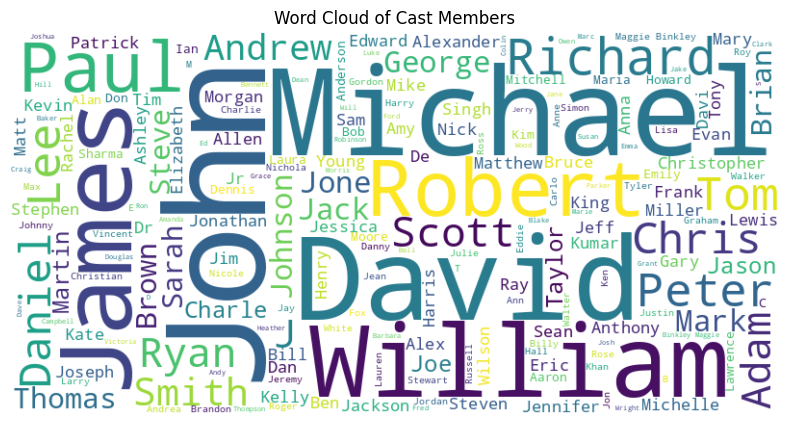

In [75]:
from wordcloud import WordCloud

all_cast = ' '.join(df['cast'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_cast)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cast Members')

plt.show()


The word cloud visualization showcases the most frequently appearing cast members in the dataset. The size of each name corresponds to its frequency of occurrence, with larger names indicating higher frequency. The word cloud provides a visual representation of the prominent actors and actresses associated with the movies and TV shows in the dataset.

**Summary**

The dataset analysis involved several visualizations to gain insights into the provided data.

First, a bar plot was created to compare the count of movies and TV shows in the dataset, revealing the distribution between the two types.

A pie chart was used to showcase the distribution of ratings, highlighting the proportion of different rating categories.

To observe trends and patterns over time, a line plot was generated to display the release year of shows/movies.

A scatter plot was created to analyze the relationship between the duration of shows/movies and their release year, providing insights into any potential correlations.

A histogram was used to visualize the distribution of movie durations in the dataset, giving an overview of the spread of durations.

Furthermore, a bar plot showcased the top 5 most frequent directors in the dataset, providing an understanding of the most prominent directors.

Lastly, a word cloud was created to visualize the most commonly appearing cast members, offering an at-a-glance view of the cast's popularity.

By leveraging these visualizations, we were able to gain a comprehensive understanding of various aspects of the dataset, including the distribution of movie vs. TV show count, rating distribution, release year trends, duration analysis, director frequencies, and popular cast members.

**Done by SYED MIRAN HUSSAIN**